In [1]:
%matplotlib inline
import helpers
reload(helpers)
from helpers import *

-28.2893952221
28048700.0
linewidth = 309.1 Hz, FT linewidth=355.6 Hz


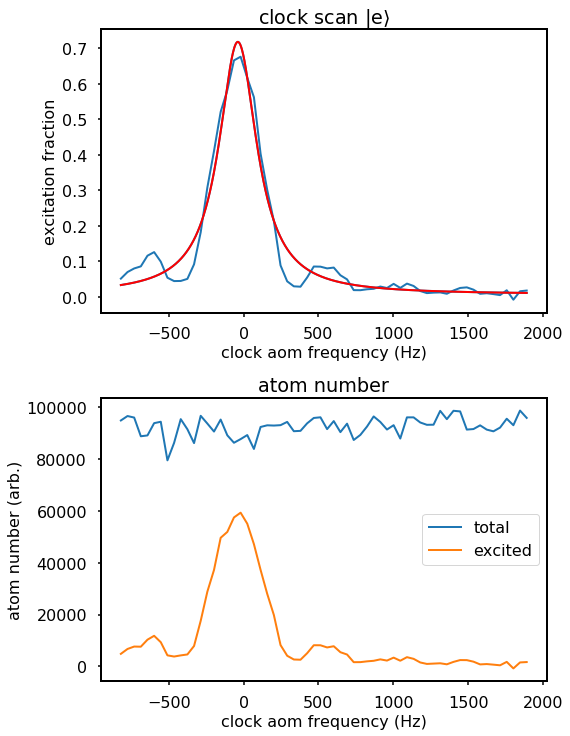

In [4]:
zero_freq = 28.0487e6 #+ 29.442533e6
center_shift = -28
zeeman_shift = 2.3699e3
# zeeman_shift = -zeeman_shift
f0 = zero_freq - zeeman_shift - center_shift

fig = None

fit_settings = {
    'p': {'a': 1, 'b': 0, 'Gamma': 1, 'x0': 0},
    'p_fix': [],
    'region': 'center',
    }
data_sets = {          
    '../../20180411/scan_clock#23': {
        'fit_settings': fit_settings,
        },           
}
    
for filename, data_set in sorted(data_sets.items()):
    data = Data(filename)
    data['name'] = filename
    data = process_clock_scan(data, f0)
    if data_set.get('fit_settings'):
        data = fit_clock_scan(data, data_set.get('fit_settings'), do_print=True) 
        print data['fit_clock_scan']['fit']['x0'] + center_shift
        print zero_freq #- data['fit_clock_scan']['fit']['x0']
        print 'linewidth = {:.1f} Hz, FT linewidth={:.1f} Hz'.format(data['fit_clock_scan']['fit']['Gamma'], 0.8/data['sequencer']['*Trabi'][1])
    fig = plot_clock_scan(data, fig, units='Hz')
    data_set['data'] = data
#    print data['beta']['frequency']



## optical spectrum analysis

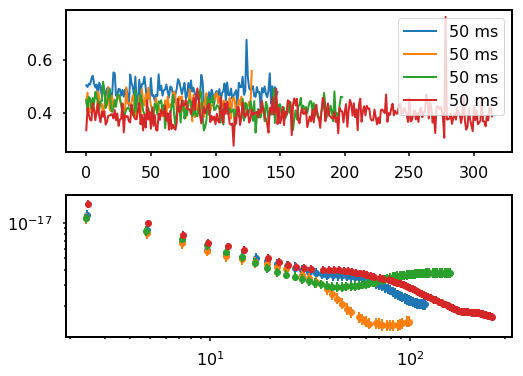

In [110]:
zero_freq = 28.0482e6 #+ 29.442533e6
center_shift = 10
zeeman_shift = 2.3699e3
# zeeman_shift = -zeeman_shift
f0 = zero_freq - zeeman_shift - center_shift

fig = None

fit_settings = {
    'p': {'a': -1, 'b': 0, 'Gamma': 1, 'x0': 0},
    'p_fix': [],
    'region': 'center',
    }
data_sets = {        
    # 50 ms
    '../../20180411/scan_clock#31': {
        'cuts': [(0, 150)]
    },     
    # 50 ms
    '../../20180411/scan_clock#33': {
        'cuts': [(50, 180)]
    },      
    # 50 ms
    '../../20180411/scan_clock#36': {
        'cuts': [(10, 210)]
    },   
    # 50 ms
    '../../20180411/scan_clock#50': {
        'cuts': [(10, None)]
    },             
}

import allantools
fig, ax = plt.subplots(2, 1)
labels = []
for filename, data_set in sorted(data_sets.items()):    
    data = Data(filename, cuts=data_set.get('cuts'))
    data['name'] = filename
    data = process_clock_scan(data, f0)
    fracs = data['pmt']['frac']
    freqs = np.pi * np.mean(data['sequencer']['*Tramsey']) * fracs
    ln = ax[0].plot(fracs)
    (taus_, devs_, errs_, n) = allantools.totdev(freqs / 429e12,
           rate=1. / np.mean(np.diff(data['time']['timestamp'])), data_type='freq', taus='all')
    x_len = len(taus_) / 3        
    for tau, dev, err in zip(taus_[:x_len], devs_[:x_len], errs_[:x_len]):
        ax[1].plot(tau, dev, 'o', label='error signal', color=ln[0].get_color())
        ax[1].plot([tau, tau], [dev - err, dev + err], '-', color=ln[0].get_color()) 

    data_set['data'] = data
    labels.append('{0:.0f} ms'.format(np.mean(data['sequencer']['*Tramsey']) * 1e3))
    
ax[0].legend(labels, loc='best')
ax[1].set_xscale('log')
ax[1].set_yscale('log')